In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
##REad the dataset
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


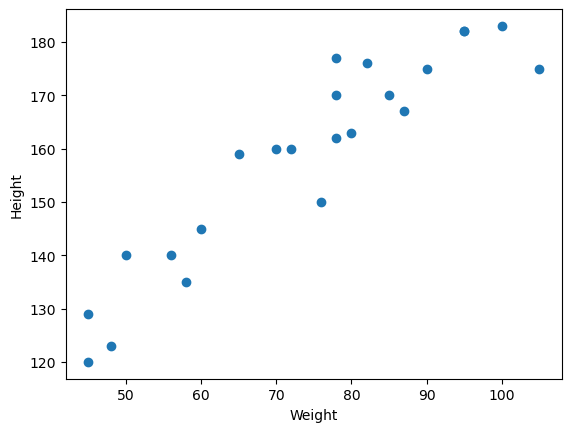

In [12]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [11]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


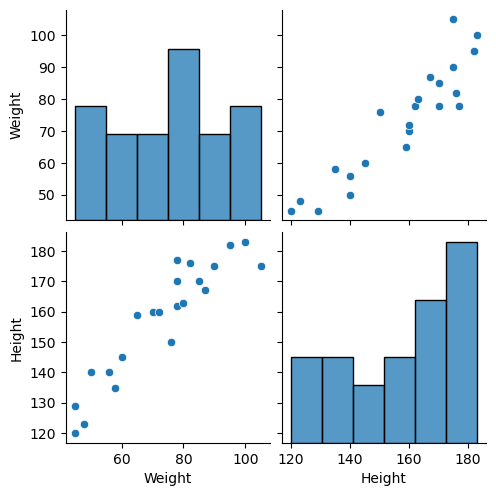

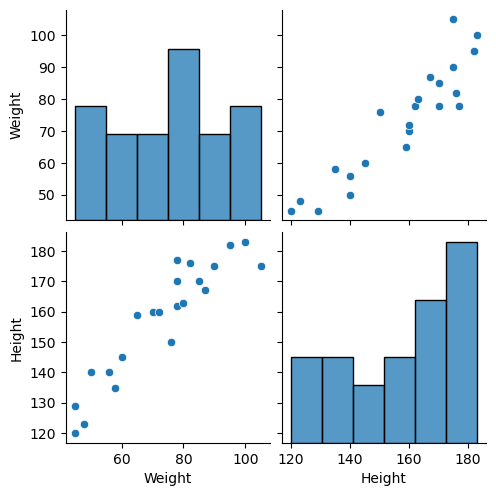

In [14]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [18]:
## Independent and dependent features
X = df[['Weight']] ### independent features shoudl be data frame or 2 dimensional array
y = df['Height']  ### dependent feature can be series or one dimensional array

In [19]:
np.array(X).shape

(23, 1)

In [20]:
np.array(y).shape

(23,)

In [17]:
X_series = df['Weight']  ### this is a series or one dimensional array
np.array(X_series).shape

(23,)

In [22]:
## Train Test Split (VVV Imp)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.shape

(17, 1)

In [7]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [8]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [24]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() ## create an object of StandardScaler
X_train=scaler.fit_transform(X_train)


In [25]:
X_test=scaler.transform(X_test)

In [28]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

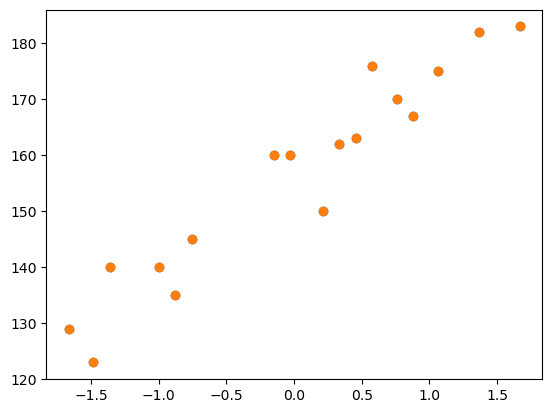

In [27]:
plt.scatter(X_train,y_train)
plt.show()

In [30]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [39]:
regression =LinearRegression(n_jobs=-1) ## create an object of LinearRegression

In [40]:
regression

LinearRegression(n_jobs=-1)

In [41]:
type(X_train)

numpy.ndarray

In [44]:
# X_train=np.array(X_train).reshape(-1,1)
# X_test=np.array(X_test).reshape(-1,1)

In [43]:
y_train.shape

(17,)

In [45]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [38]:
regression.fit(X_series,y) ## fitting on 1D array gives error

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [46]:
## coefficient and intercepts
print("Coefficient or Slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient or Slope :  [17.2982057]
Intercept :  156.47058823529412


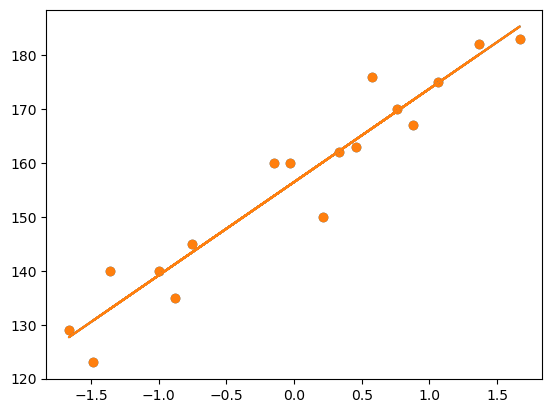

In [48]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =156.470 + 17.29(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [50]:
## Prediction of test data
y_pred_test=regression.predict(X_test)

In [51]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

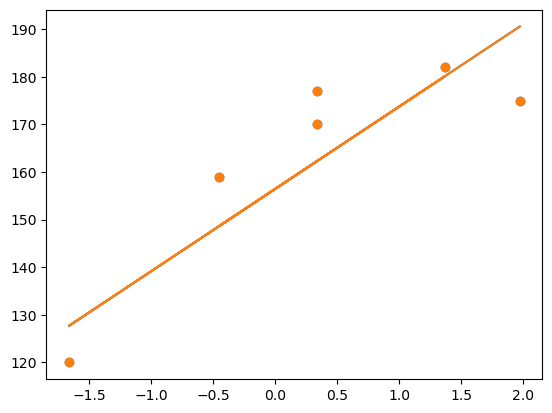

In [53]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test))
plt.show()

In [54]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [55]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [57]:
from sklearn.metrics import r2_score

In [58]:
score=r2_score(y_test,y_pred_test)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [59]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

## Using OLS

In [60]:
import statsmodels.api as sm

In [62]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
print(predictions)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 19 Dec 2025   Prob (F-statistic):                       0.664
Time:                        16:31:53   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Priyanshu\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [65]:
regression.coef_ ## OLS and sklearn give same coefficients

array([17.2982057])

In [66]:
regression.predict(scaler.transform([[75]]))

c:\Users\Priyanshu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([159.12122213])

### Additionals after Lecture ended

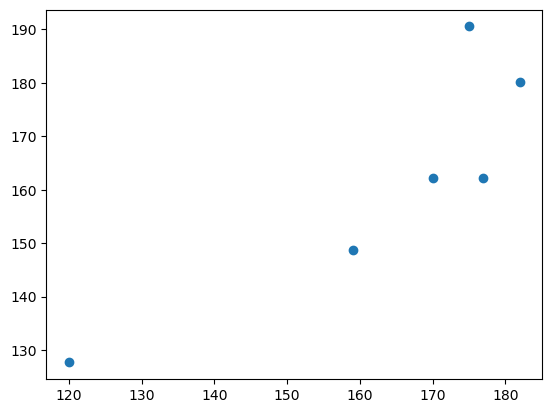

In [68]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)
plt.show()

In [69]:
## Residuals
residuals=y_test-y_pred_test

residuals



15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

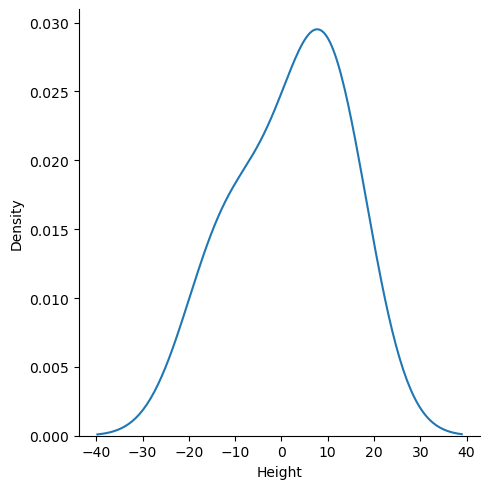

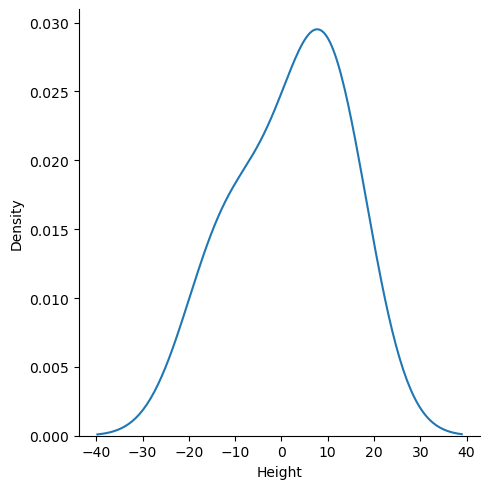

In [73]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")
plt.show()


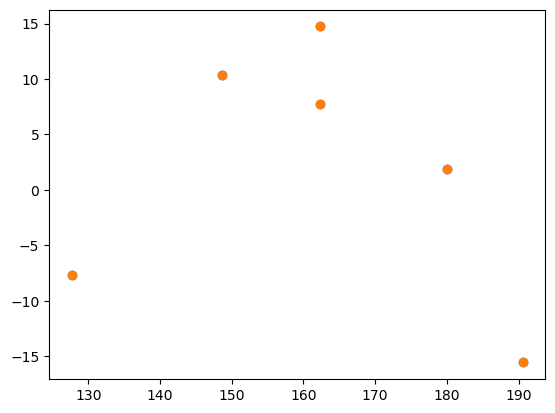

In [75]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)
plt.show()